In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1 = np.array([762, 1390, 1])
y1 = np.array([362, 1114, 1])

x2 = np.array([754, 1079, 1])
y2 = np.array([595, 925, 1])

x3 = np.array([463, 1249, 1])
y3 = np.array([277, 871, 1])

x4 = np.array([654, 1092, 1])
y4 = np.array([414, 792, 1])

x5 = np.array([1261, 1179, 1])
y5 = np.array([867, 1267, 1])

x6 = np.array([1438, 686, 1])
y6 = np.array([1404, 1059, 1])

x8 = np.array([442, 916, 1])
y8 = np.array([506, 667, 1])

x9 = np.array([1305, 840, 1])
y9 = np.array([898, 839, 1])

x10 = np.array([1504, 296, 1])
y10 = np.array([1502, 624, 1])

x11 = np.array([637, 61, 1])
y11 = np.array([1051, 74, 1])

x12 = np.array([381, 558, 1])
y12 = np.array([501, 233, 1])

x13 = np.array([995, 607, 1])
y13 = np.array([859, 541, 1])

x14 = np.array([1220, 549, 1])
y14 = np.array([1071, 620, 1])

y15 = np.array([1161, 486, 1])

x16 = np.array([917, 425, 1])

x17 = np.array([1000, 466, 1])
y17 = np.array([874, 373, 1])

x18 = np.array([1234, 405, 1])
y18 = np.array([1096, 456, 1])

x19 = np.array([1147, 223, 1])
y19 = np.array([1185, 311, 1])

x20 = np.array([927, 281, 1])
y20 = np.array([973, 235, 1])

In [3]:
xs = [x1, x2, x3, x4, x9, x10, x11, x12]
ys = [y1, y2, y3, y4, y9, y10, y11, y12]

In [4]:
def invisible_point(A, B, C, D, X1, X2):
    
    def cross(a, b):
        c1 = int(a[1]) * int(b[2]) - int(a[2]) * int(b[1])
        c2 = int(a[2]) * int(b[0]) - int(a[0]) * int(b[2]) 
        c3 = int(a[0]) * int(b[1]) - int(a[1]) * int(b[0])

        return [c1,c2,c3]

    cross_product = np.array(
        cross(cross(cross(cross(A[0], A[1]), cross(B[0], B[1])), X1),
        cross(cross(cross(C[0], C[1]), cross(D[0], D[1])), X2)
    ))
    
    cross_product = cross_product / cross_product[-1]

    return cross_product

## Calculating fundamental matrix

In [5]:
A = []
for i in range(len(xs)):
    B = np.array([xs[i][0] * ys[i][0] , xs[i][1] * ys[i][0] , xs[i][2] * ys[i][0], 
                  xs[i][0] * ys[i][1] , xs[i][1] * ys[i][1] , xs[i][2] * ys[i][1], 
                  xs[i][0] * ys[i][2] , xs[i][1] * ys[i][2] , xs[i][2] * ys[i][2]])
    
    if len(A) == 0:
        A = B   
    else:
        A = np.vstack((A, B))

print(A)

[[ 275844  503180     362  848868 1548460    1114     762    1390       1]
 [ 448630  642005     595  697450  998075     925     754    1079       1]
 [ 128251  345973     277  403273 1087879     871     463    1249       1]
 [ 270756  452088     414  517968  864864     792     654    1092       1]
 [1171890  754320     898 1094895  704760     839    1305     840       1]
 [2259008  444592    1502  938496  184704     624    1504     296       1]
 [ 669487   64111    1051   47138    4514      74     637      61       1]
 [ 190881  279558     501   88773  130014     233     381     558       1]]


In [6]:
U, S, V = np.linalg.svd(A)
F = V[-1].reshape((3, 3))
print(f'Fundamental matrix:\n{F}')

Fundamental matrix:
[[ 2.03034876e-07  2.47944794e-07 -1.22656699e-03]
 [-3.95183317e-07  1.91433528e-07  1.04165471e-03]
 [ 2.64305367e-04 -1.48166896e-03  9.99997573e-01]]


## Test

In [7]:
lst = zip(xs, ys)
np.array(list(map(lambda X: np.transpose(X[1]).dot(F).dot(X[0]), lst)))

array([ 4.44089210e-16,  4.81836793e-14,  1.11022302e-13,  6.86117829e-14,
       -3.38618023e-14, -2.12607709e-13, -8.37108161e-14,  2.58681965e-14])

In [8]:
np.linalg.det(F)

-1.376569431179585e-13

## Calculating epipoles

In [9]:
U, D, V = np.linalg.svd(F)
e1 = V[:][-1]
e1 = e1 / e1[2]
print(f'e1 = {e1}')

e1 = [3.63720167e+03 1.32372992e+03 1.00000000e+00]


In [10]:
e2 = U[:, -1]
e2 = e2 / e2[2]
print(f'e2 = {e2}')

e2 = [3.33972004e+03 2.97257115e+03 1.00000000e+00]


## Correct precision of fundamental matrix

In [11]:
D1 = np.diag([1, 1, 0]) * D

In [12]:
F1 = U.dot(D1).dot(V)
print(f'Corrected values:\n {F1}')

Corrected values:
 [[ 2.41849567e-07  2.62071085e-07 -1.22656698e-03]
 [-3.60635681e-07  2.04006859e-07  1.04165472e-03]
 [ 2.64305378e-04 -1.48166896e-03  9.99997573e-01]]


In [13]:
print(f'det(F1) = {np.linalg.det(F1)}')

det(F1) = 1.041750418322162e-28


## Reconstruction

In [14]:
T1 = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0]
])
print(f'First camera matrix:\n{T1}')

First camera matrix:
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]]


In [15]:
E2 = np.array([
    [0, -e2[2], e2[1]],
    [e2[2], 0, -e2[0]],
    [-e2[1], e2[0], 0]
])

T2 = np.transpose(np.vstack((np.transpose(E2.dot(F1)), e2)))
print(f'Second camera matrix:\n{T2}')

Second camera matrix:
[[ 7.85666904e-01 -4.40436661e+00  2.97256290e+03  3.33972004e+03]
 [-8.82705727e-01  4.94835978e+00 -3.33971316e+03  2.97257115e+03]
 [-1.92333726e-03 -9.76991521e-05  7.12489277e+00  1.00000000e+00]]


In [16]:
def equations(X, Y):
    return np.array([X[1]*T1[2] - X[2]*T1[1],
                    -X[0]*T1[2] + X[2]*T1[0],
                    Y[1]*T2[2] - Y[2]*T2[1],
                    -Y[0]*T2[2] + Y[2]*T2[0]])

In [17]:
x7 = invisible_point((x11, x12), (x9, x10), (x10, x11), (x9, x12), x8, x6)
y7 = invisible_point((y11, y12), (y9, y10), (y10, y11), (y9, y12), y8, y6)
x15 = invisible_point((x17, x20), (x18, x19), (x17, x18), (x19, x20), x14, x16)
y16 = invisible_point((x19, x20), (x17, x18), (x17, x20), (x18, x19), x15, x13)

In [18]:
image1 = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20]
image2 = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19, y20]

In [19]:
def coords(L, R):
    U, D, V = np.linalg.svd(equations(L, R))
    P = V[-1]
    P = P / P[3]
    return P[:-1]

In [20]:
reconstructed = []
for i in range(len(image1)):
    reconstructed.append(coords(image1[i], image2[i]))

In [21]:
reconstructed

[array([4.75249969e+02, 8.98049822e+02, 6.21032199e-01]),
 array([4.34814189e+02, 6.55406511e+02, 5.78375189e-01]),
 array([3.55181850e+02, 9.81364604e+02, 7.67429908e-01]),
 array([4.92496962e+02, 8.52361957e+02, 7.55132031e-01]),
 array([5.53311289e+02, 5.60921117e+02, 4.37932547e-01]),
 array([5.10668939e+02, 2.78054932e+02, 3.59296712e-01]),
 array([356.63475016, 247.68941085,   0.53878982]),
 array([315.65963167, 673.53345609,   0.71804996]),
 array([7.52001869e+02, 5.41286652e+02, 5.80839270e-01]),
 array([6.56140093e+02, 1.84115586e+02, 4.47488954e-01]),
 array([464.4643647 ,  60.04112219,   0.73796254]),
 array([444.63407621, 668.99938569,   1.17473889]),
 array([657.95980349, 456.0258081 ,   0.67014744]),
 array([6.79184030e+02, 3.63117652e+02, 5.65563286e-01]),
 array([6.22217625e+02, 2.54823608e+02, 5.58168395e-01]),
 array([604.60220849, 352.52238128,   0.67308587]),
 array([750.9781113 , 422.00480271,   0.76462052]),
 array([7.58590524e+02, 3.24275223e+02, 6.28081744e-01])

In [22]:
tmp = np.eye(3)
tmp[2][2] = 400

reconstructed400 = np.zeros((20, 3))
for i in range(len(reconstructed)):
    reconstructed400[i] = tmp.dot(reconstructed[i])

In [23]:
small_edges = [(1, 2), (2, 3), (3, 1), (1, 4), (2, 4), (3, 4)]
middle_edges = [(13, 14),(14, 15),(15, 16),(16, 13),(17, 18),(18, 19),
                (19, 20), (20, 17), (13, 17), (14, 18), (15, 19), (16, 20)]
big_edges = [(5, 6), (6, 7), (7, 8), (8, 5), (9, 10), (10, 11),
             (11, 12), (12, 9), (5, 9), (6, 10), (7, 11), (8, 12)]

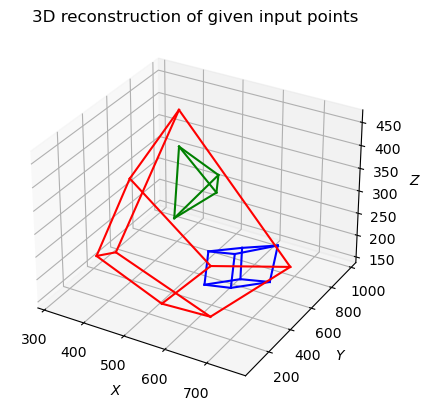

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for (i, j) in small_edges:
    ax.plot(
        [reconstructed400[i - 1][0], reconstructed400[j - 1][0]],
        [reconstructed400[i - 1][1], reconstructed400[j - 1][1]],
        [reconstructed400[i - 1][2], reconstructed400[j - 1][2]],
        color= 'green'
    )

for (i, j) in middle_edges:
    ax.plot(
        [reconstructed400[i - 1][0], reconstructed400[j - 1][0]],
        [reconstructed400[i - 1][1], reconstructed400[j - 1][1]],
        [reconstructed400[i - 1][2], reconstructed400[j - 1][2]],
        color= 'blue'
    )
    
for (i, j) in big_edges:
    ax.plot(
        [reconstructed400[i - 1][0], reconstructed400[j - 1][0]],
        [reconstructed400[i - 1][1], reconstructed400[j - 1][1]],
        [reconstructed400[i - 1][2], reconstructed400[j - 1][2]],
        color= 'red'
    )
    
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
plt.title('3D reconstruction of given input points')
plt.show()